## Advanced Deep Learning with Keras

**Course Structure:**
* Chapter 1. The Keras Functional API
* Chapter 2. Two Input Networks Using Categorical Embeddings, Shared Layers, and Merge Layers
* Chapter 3. Multiple Inputs: 3 Inputs (and Beyond!)
* Chapter 4. Multiple Outputs

### CHAPTER 1. The Keras Functional API

#### Part 1.1 Keras input and dense layers

**Simple Keras models:**
1. Input layer
2. Output layer

* **Layers** are used to construct a deep learning model
* **Tensors** are used to define the data flow through the model

In [30]:
# Code for part 1.1

# input layer & dense layers
from keras.layers import Input, Dense

# create input layer
input_tensor = Input(shape=(1,))

# create output layer
output_layer = Dense(1)

# connect two layers
output_tensor = output_layer(input_tensor)

# alternative: connect directly
# output_tensor = Dense(1)(input_tensor)

#### Part 1.2 Build and compile a model

* Build a model with *'Model()'* class
* Compile a model with *'.compile()'* method
    * Specify optimizer
    * Specify loss 
* Summarize the model with *'model.summary()'*
* Plot the model using Keras: *'plot_model()'* and *'plt.imread()'*

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


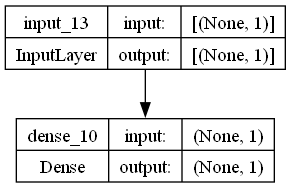

In [31]:
# Code for part 1.2 

# build a model
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model


# create input, output layers
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# build the model
model = Model(input_tensor, output_tensor)

# compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

# save the model plot to file
plot_model(model, to_file='Images/17_model.png', show_shapes=True)

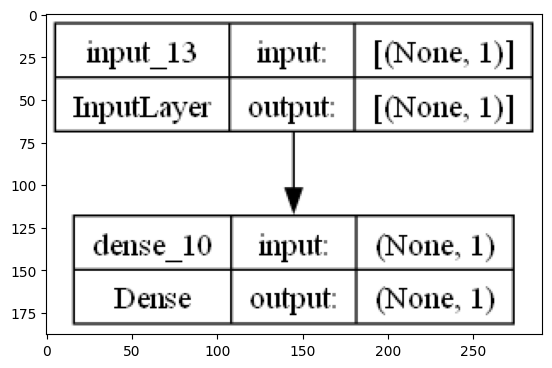

In [32]:
# Code for part 1.2 (continue)

# visualize the model
import matplotlib.pyplot as plt

data = plt.imread('Images/17_model.PNG')
plt.imshow(data)
plt.show()


#### Part 1.3 Fit and evaluate a model

* Data: basketball data
* Input: seed difference (-15 to +15)
* Output: score difference (-50 to +50)
* Fit the model to data with *'.fit()'* method
* Evaluate the model on *new data* with *'.evaluate()'* method

In [33]:
# Code for part 1.3

# fit the model to the tournament basketball data
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense

# get data
games_tourney = pd.read_csv('17_datasets/basketball_data/games_tourney.csv')
games_tourney_train = games_tourney.iloc[:3430, :]
games_tourney_test = games_tourney.iloc[3430:, :]

# build the model
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mae')

# now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1, batch_size=128, validation_split=0.1, verbose=True)

25/25 [==============================] - 0s 5ms/step - loss: 12.2689 - val_loss: 11.5102


In [34]:
# Code for part 1.3 (continue)

# evaluate the model on a test set

# get test data
X_test = games_tourney_test['seed_diff']
y_test = games_tourney_test['score_diff']

# evaluate the model
print(model.evaluate(X_test, y_test, verbose=True))

26/26 [==============================] - 0s 816us/step - loss: 11.6255
11.625494003295898


### CHAPTER 2. Two Input Networks Using Categorical Embeddings, Shared Layersm and Merge Layers

#### Part 2.1 Category embeddings

**Category embeddings:**
* Useful for dealing with **high cardinality categorical data**
* Input: integers
* Output: floats
* Embedding layer has increased data dimensionality  
* Its output layer needs to flatten back to 2 dimensions (2D)

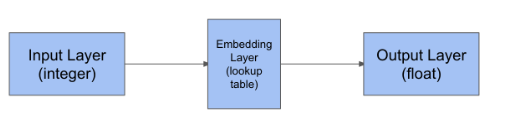

In [35]:
# display category embedding
from IPython import display
display.Image("Images/17_category_embedding.PNG")

In [36]:
# Code for part 2.1 

# define the model
import pandas as pd
from keras.models import Model
from keras.layers import Embedding, Input, Dense, Flatten
from numpy import unique

# get data
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')

# count the unique number of teams
n_teams = unique(games_season['team_1']).shape[0]

# create embedding layer
team_lookup = Embedding(input_dim=n_teams, output_dim=1, input_length=1, name='Team-Strength')

# create input layer
teamid_in = Input(shape=(1,))

# lookup the input in the team strength embedding layer
strength_lookup = team_lookup(teamid_in)

# flatten the output
strength_lookup_flat = Flatten()(strength_lookup)

# combine into a model
team_strength_model = Model(teamid_in, strength_lookup_flat, name='Team-Strength-Model')
team_strength_model.summary()


Model: "Team-Strength-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 Team-Strength (Embedding)   (None, 1, 1)              10888     
                                                                 
 flatten_4 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 10888 (42.53 KB)
Trainable params: 10888 (42.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Part 2.2 Shared layers

* Shared layers allow you to define an operation and apply it (with exact same weights) on different inputs
* It is only possible with the **Keras functional API**
* You can also share **multiple layers as a model**

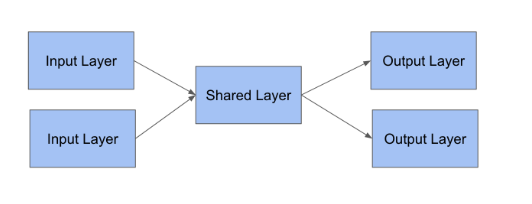

In [37]:
# display shared layers

from IPython import display
display.Image("Images/17_shared_layer.PNG")

In [38]:
# Code for part 2.2 

# defining two inputs

from keras.layers import Input 

# create 2 input layers for both teams
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')


In [39]:
# Code for part 2.2 (continue)

# lookup both inputs in the same model
from keras.layers import Input, Embedding, Flatten
from keras.models import Model
import pandas as pd
from numpy import unique

# create the team strength model with embedding layer
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
n_teams = unique(games_season['team_1']).shape[0]

teamid_in = Input(shape=(1,))
team_lookup = Embedding(input_dim=n_teams, output_dim=1, input_length=1, name='Team-Strength')
strength_lookup = team_lookup(teamid_in)
strength_lookup_flat = Flatten()(strength_lookup)
team_strength_model = Model(teamid_in, strength_lookup_flat)

# lookup both teams in the model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

#### Part 2.3 Merge layers

* It is an *advanced, non-sequential* network topology
* It provides a lot of *flexibility* to design networks 
* Kinds of merge layers:
    1. Add 
    2. Subtract
    3. Multiply
    4. Concatenate
* Note: Only *'concatenate'* can operate on layers that have **different numbers of columns**, other operations can only apply to layers that have **same numbers of columns**

In [40]:
# Code for part 2.3 

# model using two inputsand one output
from keras.layers import Subtract
from keras.models import Model

# create a subtract layer using the inputs from the above exercise
score_diff = Subtract()([team_1_strength, team_2_strength])

# create the model
model = Model([team_in_1, team_in_2], score_diff)

# compile the model
model.compile(optimizer='adam', loss='mae')

#### Part 2.4 Predict from your model

* Use the same *'.fit()'* method, but with a list of inputs
* Use the same *'.evaluate()'* method 

In [41]:
# Code for part 2.4 

# fit the created model to the regular season training data
import pandas as pd

# get the input data
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
input_1 = games_season['team_1']
input_2 = games_season['team_2']

# fit the model to input_1 and input_2, using score_diff as target
model.fit([input_1, input_2], games_season['score_diff'],
          epochs=1, batch_size=2048, validation_split=0.1, verbose=True)


138/138 [==============================] - 1s 2ms/step - loss: 12.1202 - val_loss: 11.8394


In [42]:
# Code for part 2.4 (continue)

# evaluate the model on the tournament data
import pandas as pd

# get tournament data
games_tourney = pd.read_csv('17_datasets/basketball_data/games_tourney.csv')
input_1 = games_tourney['team_1']
input_2 = games_tourney['team_2']

# evaluate the model 
print(model.evaluate([input_1, input_2], games_tourney['score_diff'], verbose=True))

133/133 [==============================] - 0s 859us/step - loss: 11.6815
11.681544303894043


### CHAPTER 3. Three Inputs(and Beyond!)

#### Part 3.1 Three-input models

* Making a model with three inputs is almost the same as making a model with two inputs
* Basically, just give a list of three inputs than a list of two inputs

In [43]:
# Code for part 3.1 

# make an input layer for home va. away
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
import pandas as pd
from numpy import unique
from keras.models import Model

# create 3 inputs: 2 teams and home
team_in_1 = Input(shape=(1,), name='Team-1-In')
team_in_2 = Input(shape=(1,), name='Team-2-In')
home_in = Input(shape=(1,), name='Home-In')

# build the team strength model
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
n_teams = unique(games_season['team_1']).shape[0]

teamid_in = Input(shape=(1,))
team_lookup = Embedding(input_dim=n_teams, output_dim=1, input_length=1, name='Team-Strength')
strength_lookup = team_lookup(teamid_in)
strength_lookup_flat = Flatten()(strength_lookup)
team_strength_model = Model(teamid_in, strength_lookup_flat)

# lookup team inputs in the team strength model
team_1_strength = team_strength_model(team_in_1)
team_2_strength = team_strength_model(team_in_2)

# combine team strengths with the home input using Concatenate layer, then Dense layer
out = Concatenate()([team_1_strength, team_2_strength, home_in])
out = Dense(1)(out)

In [44]:
# Code for part 3.1 (continue)

# make a model and compile it
from keras.models import Model

# make the model
model = Model([team_in_1, team_in_2, home_in], out)
model.compile(optimizer='adam', loss='mae')

In [45]:
# Code for part 3.1 (continue)

# fit the model and evaluate
import pandas as pd

# get datasets
games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
games_tourney = pd.read_csv('17_datasets/basketball_data/games_tourney.csv')

# fit the model to the games_season dataset
model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
          games_season['score_diff'],
          epochs=1, batch_size=2048, validation_split=0.1, verbose=True)

# evaluate the model on games_tourney dataset
print(model.evaluate([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']],
                     games_tourney['score_diff'],
                     verbose=True))

133/133 [==============================] - 0s 929us/step - loss: 11.6868
11.686822891235352


#### Part 3.2 Summarizing and plotting models

* Use *'.summary()'* to summarize a Keras model
* Use *'.plot()'* to plot a Keras model

In [46]:
# Code for part 3.2 

# summarizing the model
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Team-1-In (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 Team-2-In (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 model_16 (Functional)       (None, 1)                    10888     ['Team-1-In[0][0]',           
                                                                     'Team-2-In[0][0]']           
                                                                                                  
 Home-In (InputLayer)        [(None, 1)]                  0         []                     

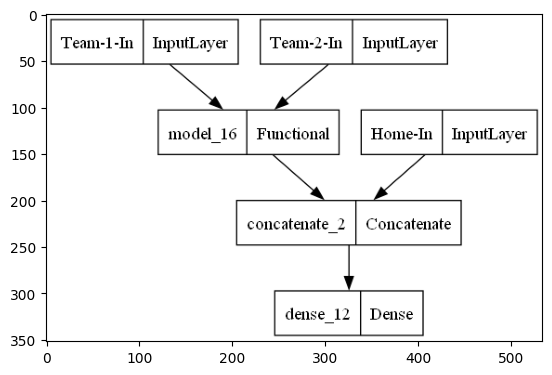

In [47]:
# Code for part 3.2 (continue)

# plotting models
import matplotlib.pyplot as plt
from keras.utils import plot_model

# plot the model
plot_model(model, to_file='Images/17_model_2.png')

# display the model
data = plt.imread('Images/17_model_2.png')
plt.imshow(data)
plt.show()


#### Part 3.3 Stacking models

**Model Stacking:**
* Using the predictions from one model as input to another model
* Advanced techniques, often employed to win popular predictive modeling competitions

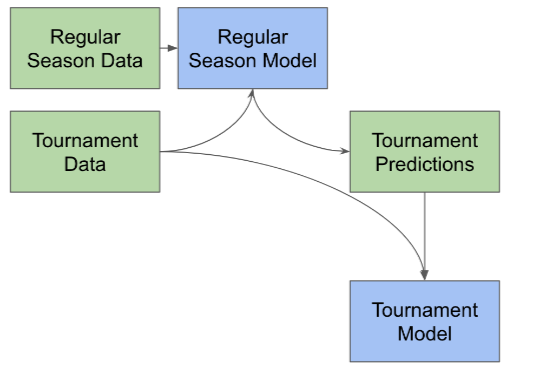

In [48]:
# display model stacking

from IPython import display
display.Image("Images/17_model_stacking.PNG")

In [49]:
# Code for part 3.3 

# add the model predictions to the tournament data
import pandas as pd
from numpy import unique
from keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from keras.models import Model

# # recall: get the model we created earlier
# # get input layers
# team_in_1 = Input(shape=(1,), name='Team-1-In')
# team_in_2 = Input(shape=(1,), name='Team-2-In')
# home_in = Input(shape=(1,), name='Home-In')
# # build the team strength model
# games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
# n_teams = unique(games_season['team_1']).shape[0]
# teamid_in = Input(shape=(1,))
# team_lookup = Embedding(input_dim=n_teams, output_dim=1, input_length=1, name='Team-Strength')
# strength_lookup = team_lookup(teamid_in)
# strength_lookup_flat = Flatten()(strength_lookup)
# team_strength_model = Model(teamid_in, strength_lookup_flat)
# # lookup team inputs in the team strength model
# team_1_strength = team_strength_model(team_in_1)
# team_2_strength = team_strength_model(team_in_2)
# # combine team strengths with the home input using Concatenate layer, then Dense layer
# out = Concatenate()([team_1_strength, team_2_strength, home_in])
# out = Dense(1)(out)
# # construct and compile the model
# model = Model([team_in_1, team_in_2, home_in], out)
# model.compile(optimizer='adam', loss='mae')
# # get datasets
# # games_season = pd.read_csv('17_datasets/basketball_data/games_season.csv')
# games_tourney = pd.read_csv('17_datasets/basketball_data/games_tourney.csv')
# # fit the model to the games_season dataset
# model.fit([games_season['team_1'], games_season['team_2'], games_season['home']],
#           games_season['score_diff'],
#           epochs=1, batch_size=2048, validation_split=0.1, verbose=True)

# predict
games_tourney['pred'] = model.predict([games_tourney['team_1'], games_tourney['team_2'], games_tourney['home']])

133/133 [==============================] - 0s 718us/step


In [50]:
# Code for part 3.2 (continue)

# create an input layer with multiple columns

from keras.layers import Input, Dense
from keras.models import Model

# split data
games_tourney_train = games_tourney.iloc[:3168, :]
games_tourney_test = games_tourney.iloc[3168:, :]

# create input tensor and output tensor
input_tensor = Input(shape=(3,))
output_tensor = Dense(1)(input_tensor)

# create the model
model = Model(input_tensor, output_tensor)

# compile the model
model.compile(optimizer='adam', loss='mae')

# fit the model
model.fit(games_tourney_train[['home', 'seed_diff', 'pred']],
          games_tourney_train['score_diff'],
          epochs=1, verbose=True)

# evaluate the model
print(model.evaluate(games_tourney_test[['home', 'seed_diff', 'pred']], 
                     games_tourney_test['score_diff'],
                     verbose=True))

# the new model looks not bad!

34/34 [==============================] - 0s 760us/step - loss: 9.1136
9.113553047180176


### CHAPTER 4. Multiple Outputs

#### Part 4.1 Two-output models

* This kind of model makes predictions for *two targets* at once
* The size of the output layer increased from **one** to **two**

In [51]:
# Code for part 4.1 

# simple two-output model
from keras.models import Model
from keras.layers import Input, Dense

# create input tensor and output tensor
input_tensor = Input(shape=(2,))
output_tensor = Dense(2)(input_tensor)
model = Model(input_tensor, output_tensor)

# compile the model
model.compile(optimizer='adam', loss='mae')

# fit the model
model.fit(games_tourney_train[['seed_diff', 'pred']],
          games_tourney_train[['score_1', 'score_2']],
          verbose=True, epochs=100, batch_size=16384)

Epoch 1/100
1/1 [==============================] - 0s 237ms/step - loss: 71.9056
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 71.9045
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 71.9034
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 71.9023
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 71.9012
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 71.9001
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 71.8990
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 71.8979
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 71.8968
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 71.8957
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 71.8946
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 71.8935
Epoch 13/100
1/1 [=============================

In [52]:
# Code for part 4.1 (continue)

# inspecting the model

# print model weights
print(model.get_weights())

# print column means of the training data
print(games_tourney_train.mean())

[array([[ 1.0049862 , -0.7526158 ],
       [-0.43234545,  0.7683872 ]], dtype=float32), array([0.09999932, 0.09999932], dtype=float32)]
season        1997.045455
team_1        5546.025568
team_2        5546.025568
home             0.000000
seed_diff        0.000000
score_diff       0.000000
score_1         71.912247
score_2         71.912247
won              0.500000
pred             0.097509
dtype: float64


In [53]:
# Code for part 4.1 (continue)

# evaluate the model
print(model.evaluate(games_tourney_test[['seed_diff', 'pred']],
                     games_tourney_test[['score_1', 'score_2']], verbose=False))

# the model didn't work very well!

68.68512725830078


#### Part 4.2 Single model for classification and regression

*